In [1]:
import sys
sys.path.append("/global/home/users/avirukt/name/")
from power_spectrum import *

In [2]:
tf.enable_eager_execution()
warnings.filterwarnings('ignore')

In [10]:
batch_size = 256

def input_fn(version):
    feature_description = {
        'field': tf.FixedLenFeature([2**16], tf.float32),
        "params": tf.FixedLenFeature([3], tf.float32)
    }

    if "random_mask" in version:
        feature_description["mask"] = tf.FixedLenFeature([2**16], tf.float32)

        def parse(example_proto):
            # Parse the input tf.Example proto using the dictionary above.
            d = tf.parse_single_example(example_proto, feature_description)
            return (tf.reshape(tf.stack([d["field"],d["mask"]],axis=-1),(256,256,2)),d["params"])
    else:
        def parse(example_proto):
            # Parse the input tf.Example proto using the dictionary above.
            d = tf.parse_single_example(example_proto, feature_description)
            return (tf.reshape(d["field"],(256,256)),d["params"])

    def fn():
        files = ["/global/scratch/avirukt/jia_sims/%s/9%03d.tfrecord"%(version,i) for i in range(1000)] #use last 1k tfrecords for testing
        return tf.data.TFRecordDataset(files).map(parse).batch(batch_size)
    
    return fn

In [11]:
model = LFI(["field"], [r"$M_\nu$",r"$\Omega_m$",r"$\sigma_8$"], model_dir='/global/scratch/avirukt/models/noiseless-64df02f')

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/global/scratch/avirukt/models/noiseless-64df02f', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x2b86a5b05cc0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [17]:
lower = np.array([0, 0.15, 0.45])
upper = np.array([.65, 0.45, 1.1])
bounds = list(zip(lower,upper))

In [18]:
p = load("../params.npy")
a = p[2:16]
p[16] = p[1]
p[1:15] = a

In [19]:
post = model.plot_posteriors(testing_fn=input_fn("noiseless"),p=p,bounds=bounds)

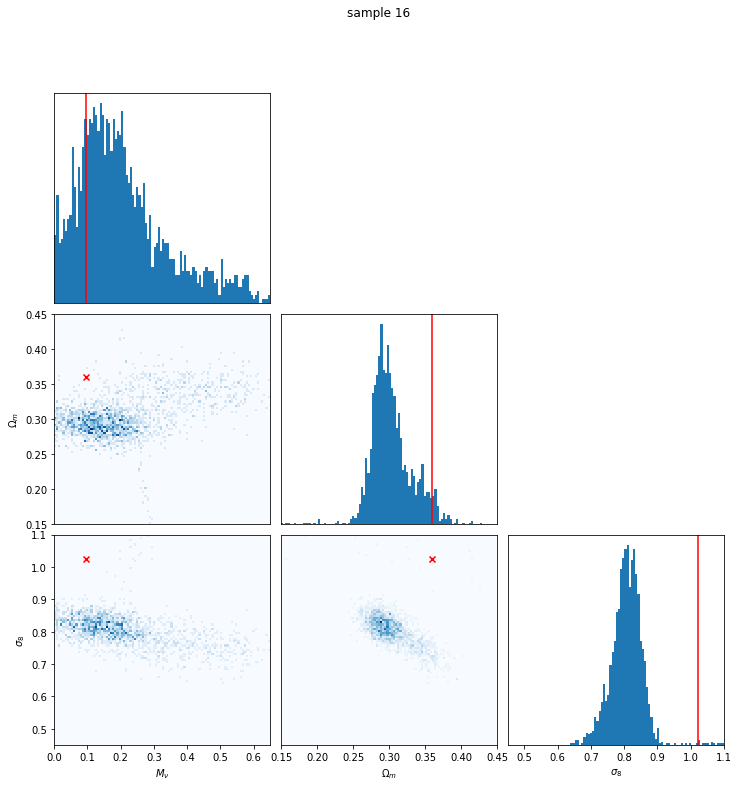

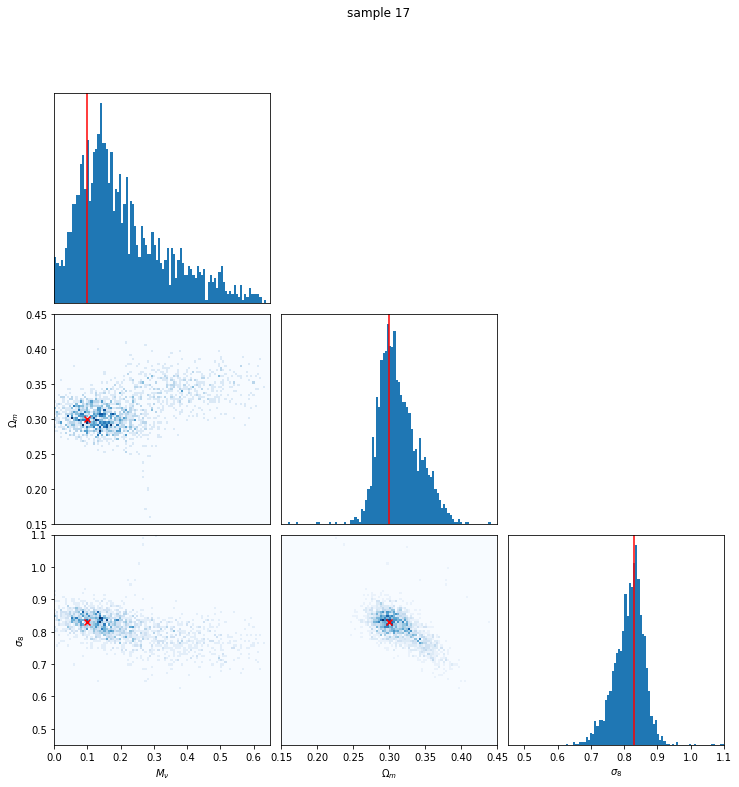

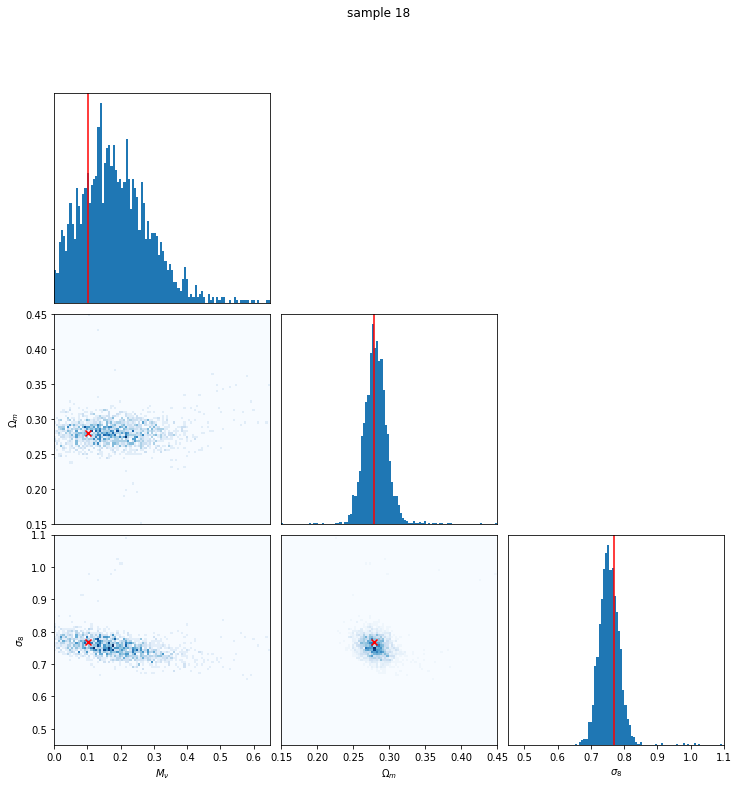

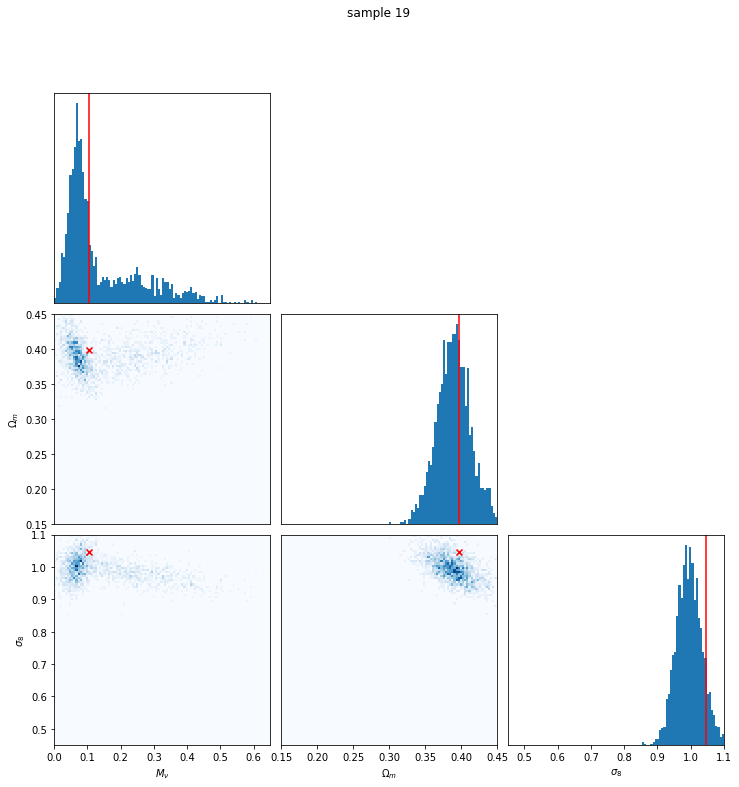

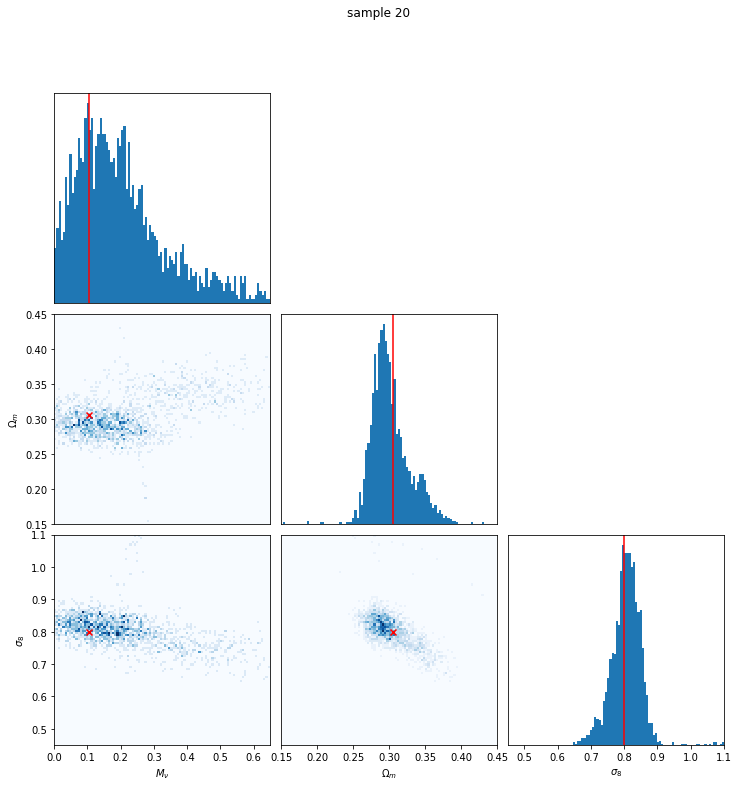

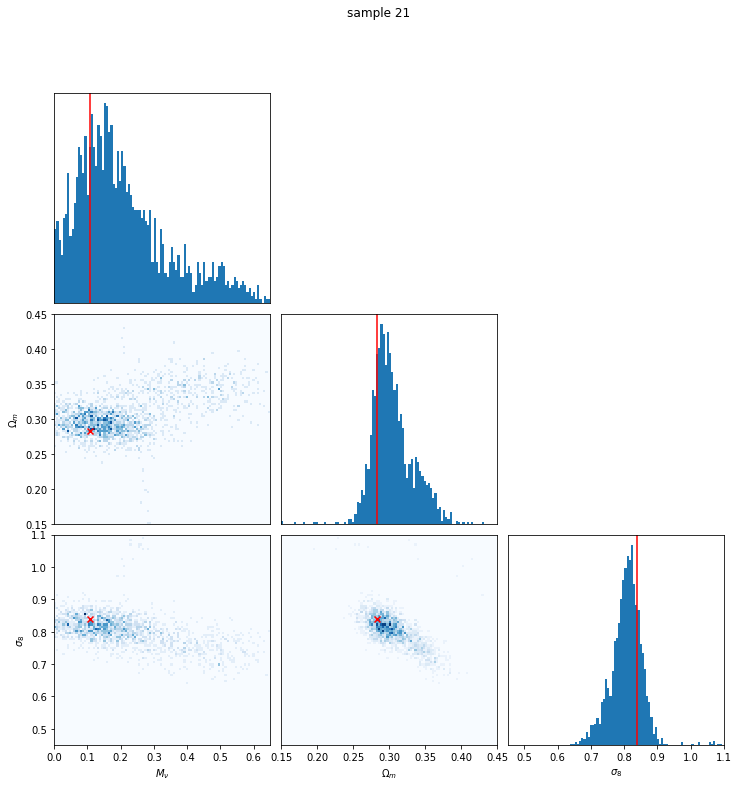

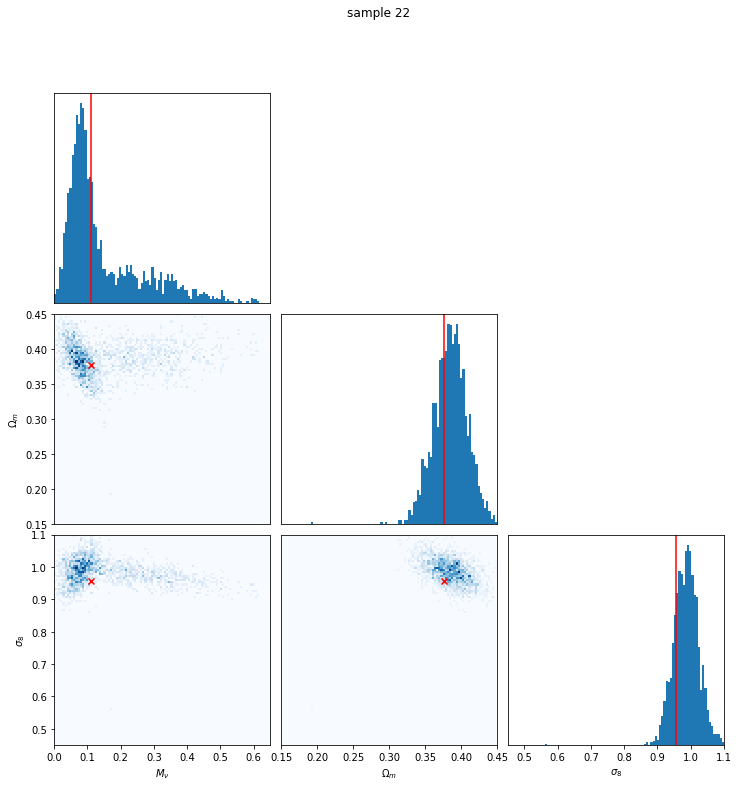

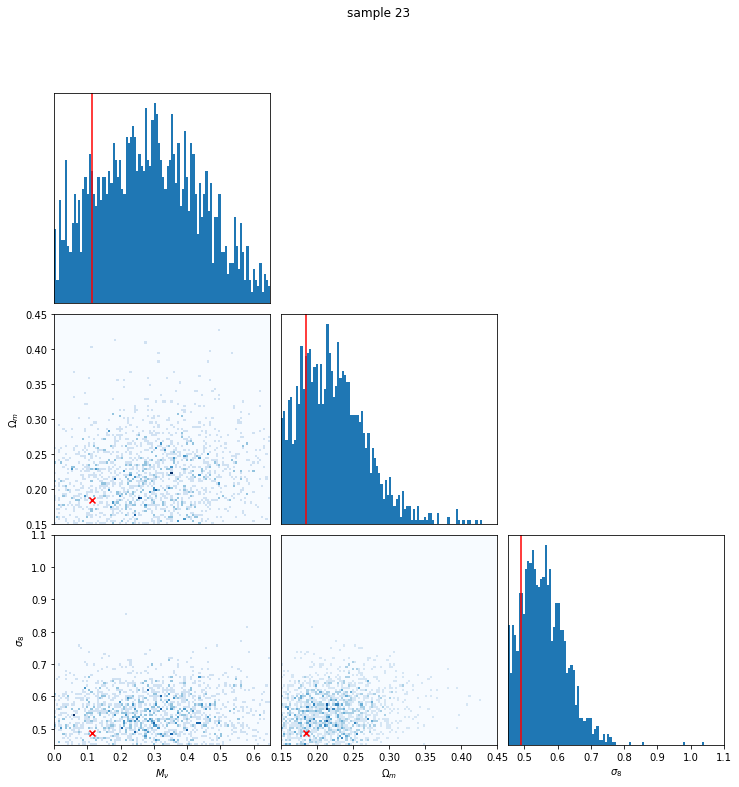

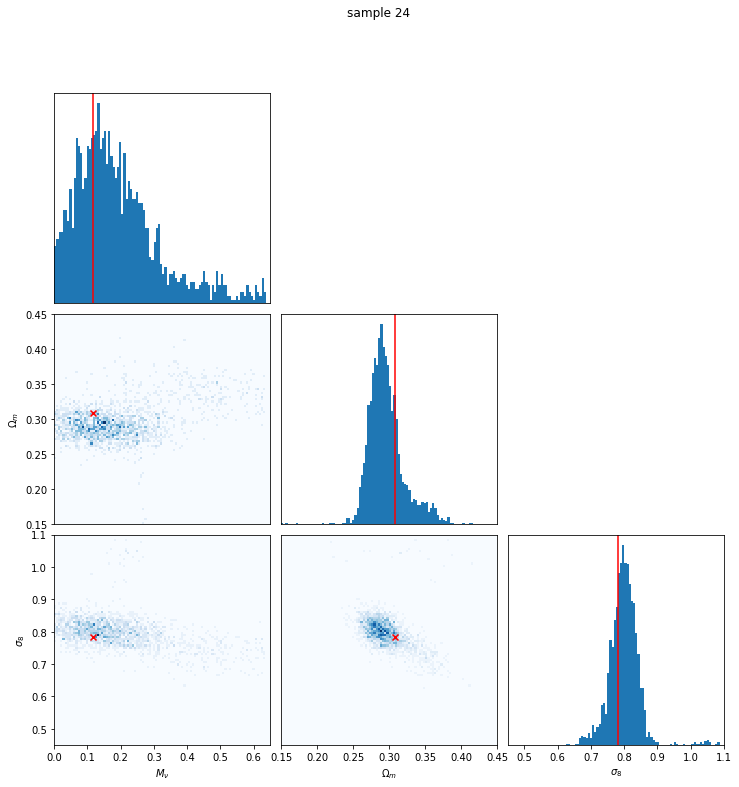

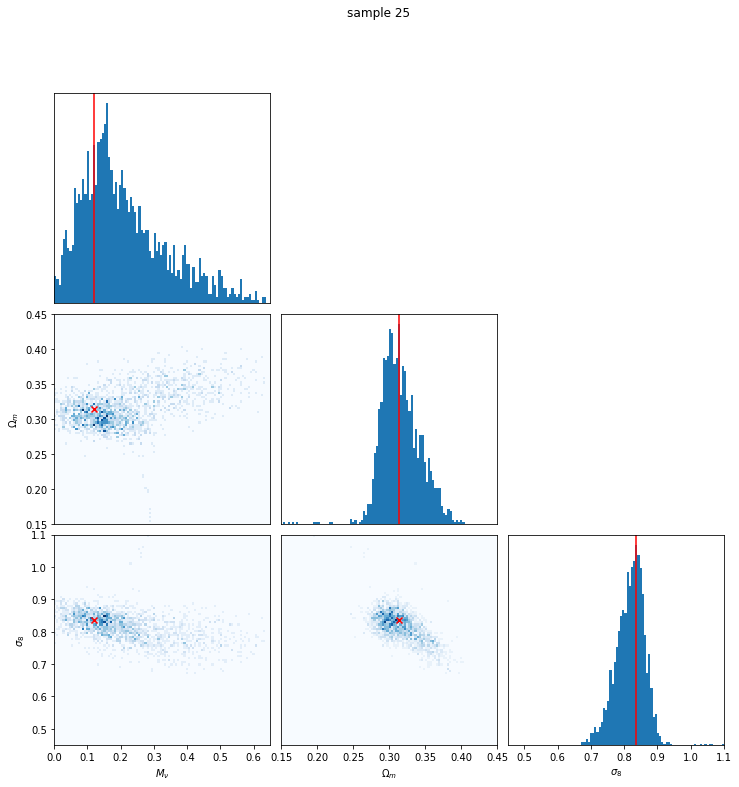

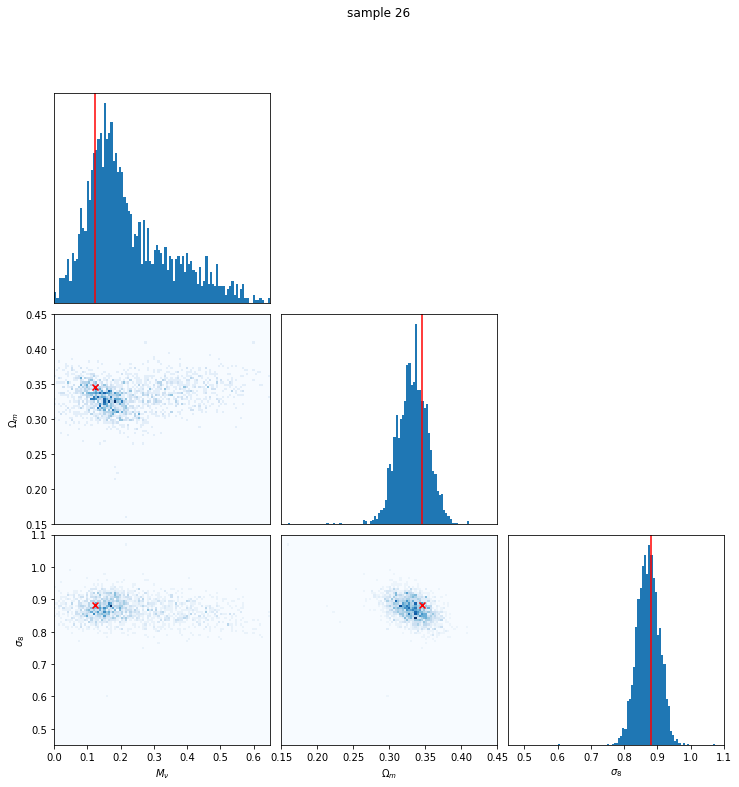

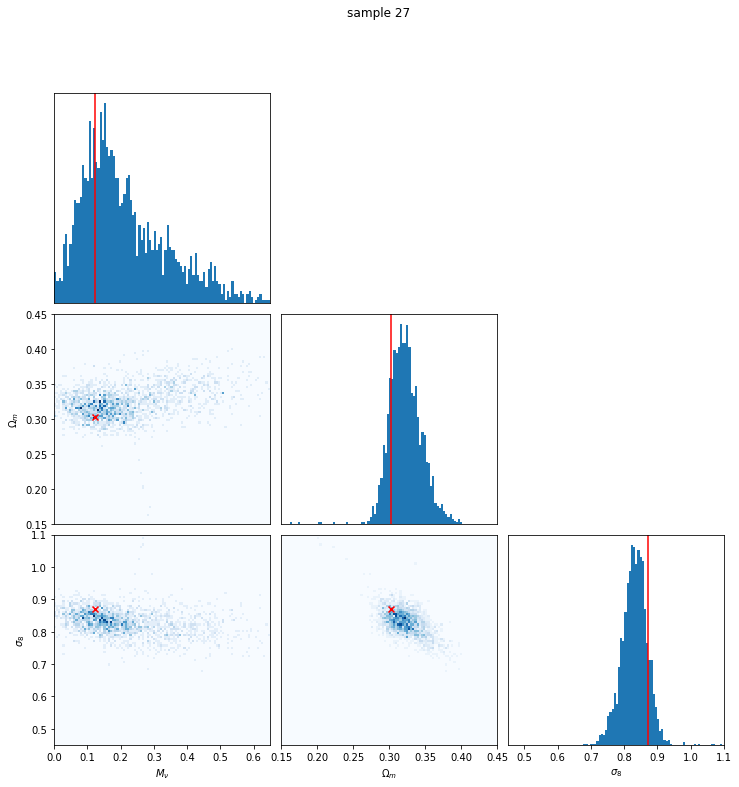

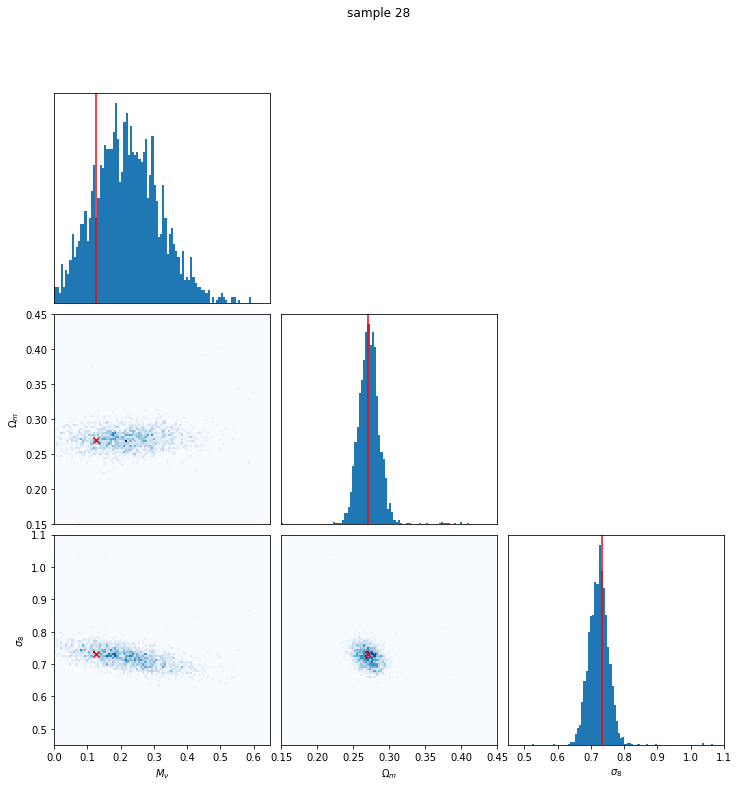

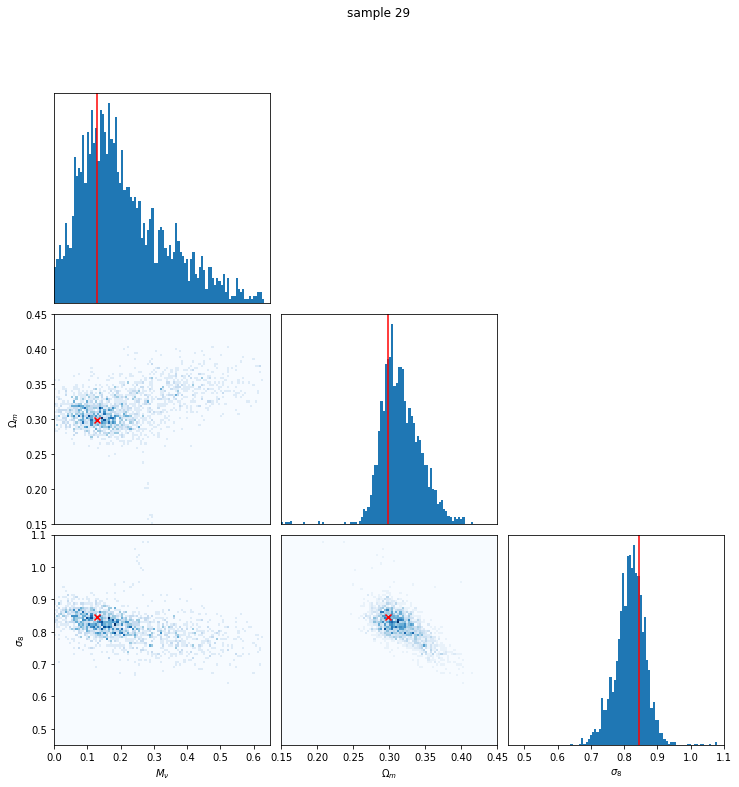

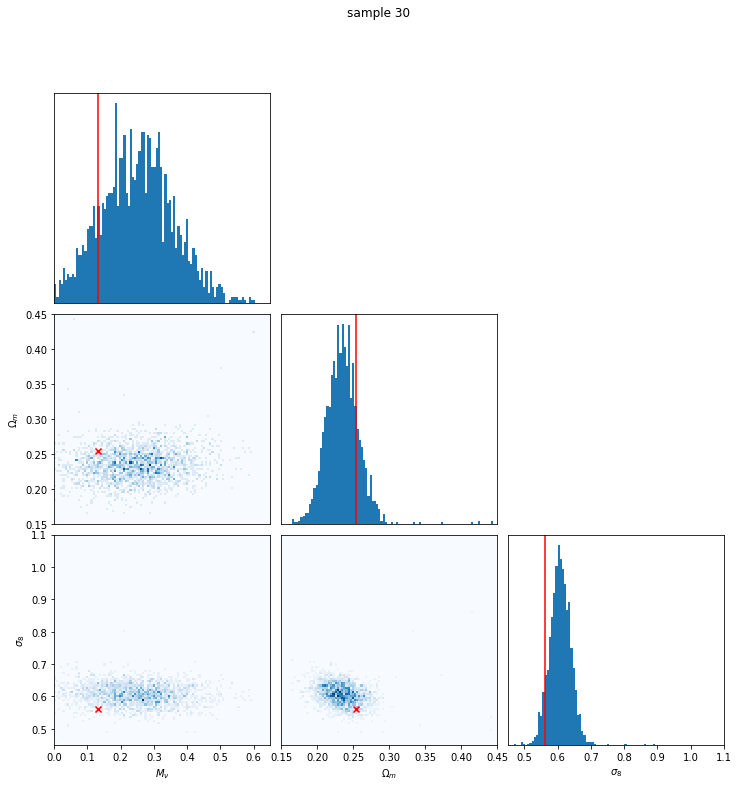

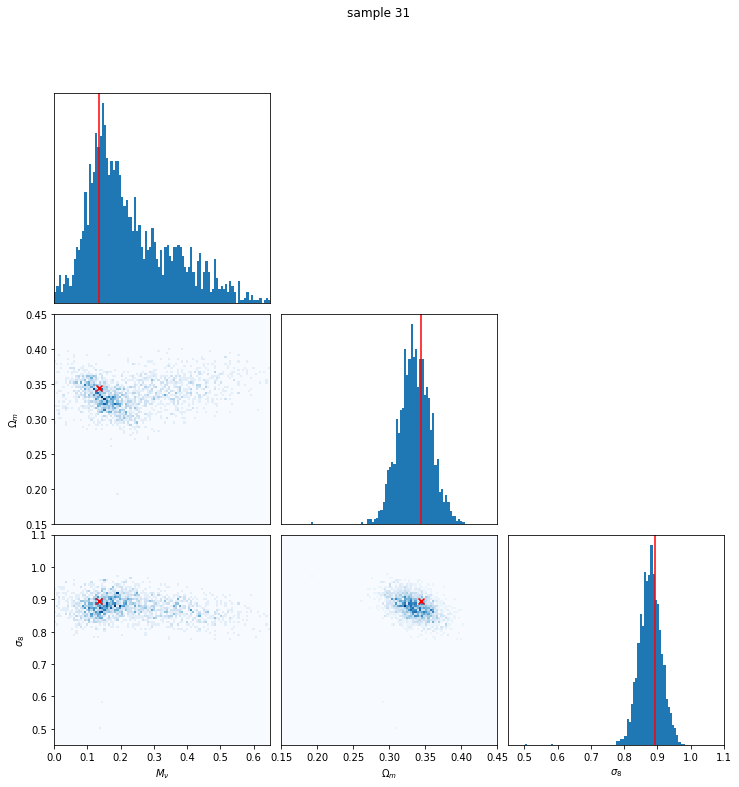

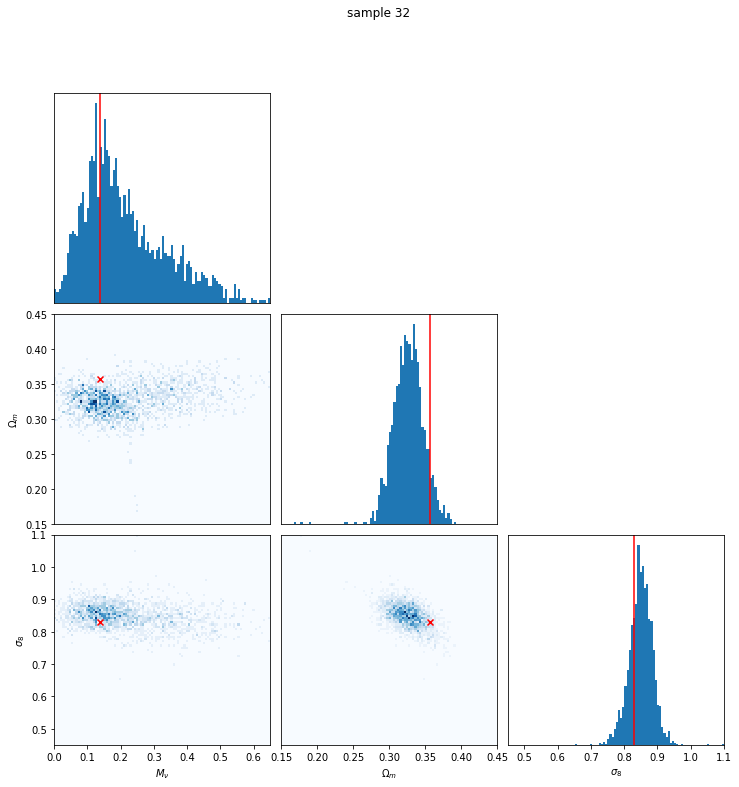

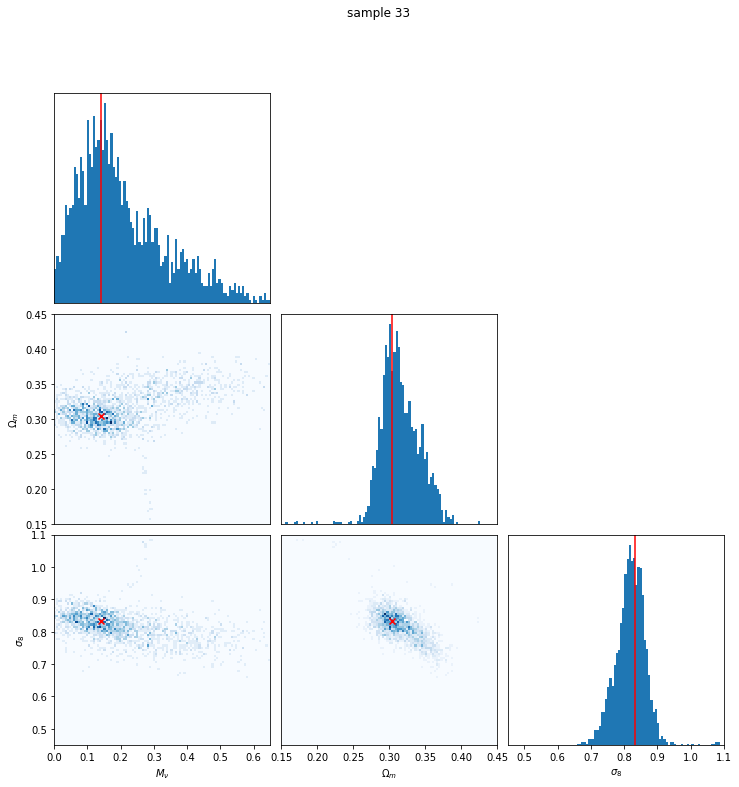

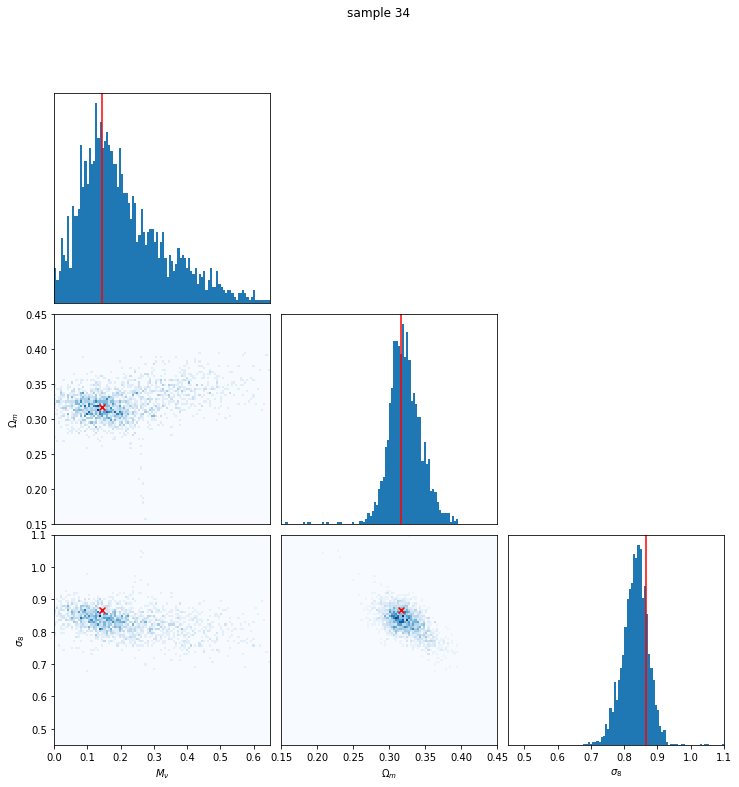

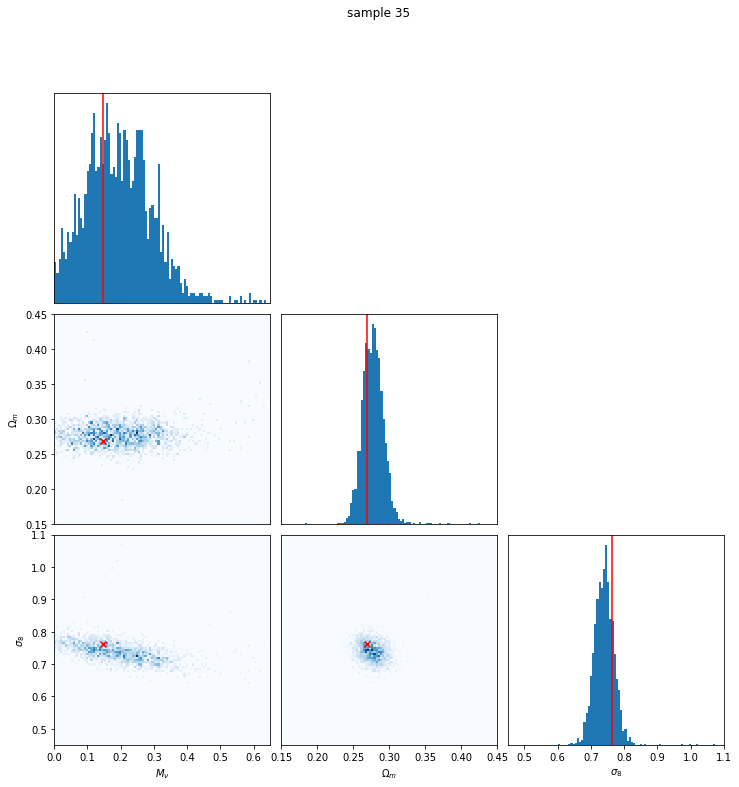

In [21]:
for i in range(20):
    next(post)